### Python Tutorial:
https://realpython.com/python-opencv-color-spaces/

In [13]:
import cv2

In [14]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

In [15]:
len(flags)

274

In [16]:
flags[40]

'COLOR_BGR2HLS'

In [17]:
import matplotlib.pyplot as plt
import numpy as np

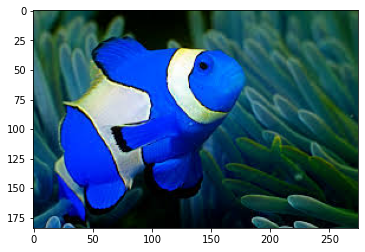

In [18]:
nemo = cv2.imread('./images/nemo0.jpg')
plt.imshow(nemo)
plt.show()

OpenCV by default reads images in BGR format. That's why the fish is blue

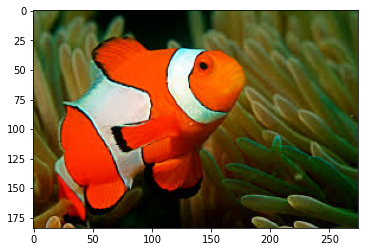

In [19]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

Now Nemo looks much more like himself.

### Visualizing Nemo in RGB Color Space


In [20]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

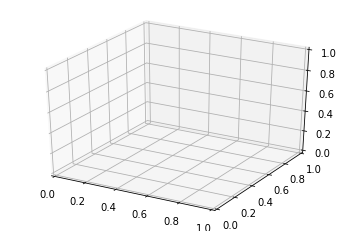

In [21]:
r, g, b = cv2.split(nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

In [22]:
pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

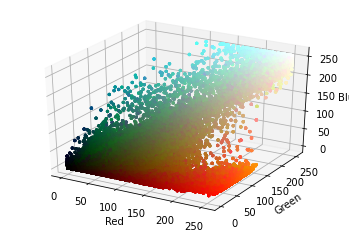

In [31]:
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()
fig

### Visualizing Nemo in HSV Color Space

In [32]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

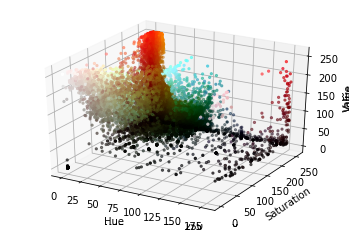

In [34]:
h, s, v = cv2.split(hsv_nemo)
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()
fig

### Picking Out a Range

In [35]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

In [36]:
from matplotlib.colors import hsv_to_rgb

In [37]:
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

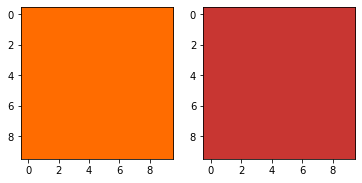

In [38]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

In [40]:
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)

In [41]:
result = cv2.bitwise_and(nemo, nemo, mask=mask)

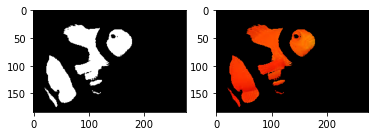

In [42]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [43]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

In [44]:
lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0

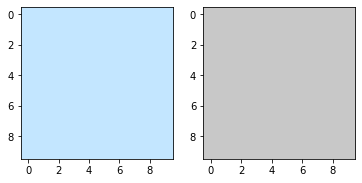

In [45]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(dw_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lw_square))
plt.show()

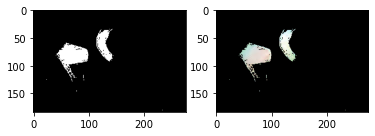

In [46]:
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2) 
plt.imshow(result_white)
plt.show()

#### Combining the masks

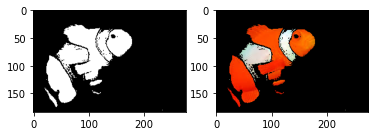

In [47]:
final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

#### Reducing noise

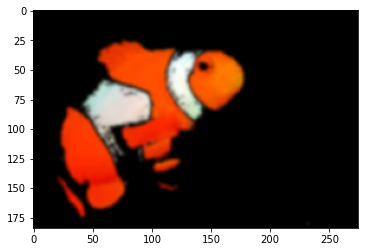

In [48]:
blur = cv2.GaussianBlur(final_result, (7, 7), 0)
plt.imshow(blur)
plt.show()

### Does This Segmentation Generalize to Nemo’s Relatives?

In [49]:
path = "./images/nemo"

nemos_friends = []
for i in range(6):
   friend = cv2.cvtColor(cv2.imread(path + str(i) + ".jpg"), cv2.COLOR_BGR2RGB)
   nemos_friends.append(friend)

In [50]:
def segment_fish(image):
    ''' Attempts to segment the clownfish out of the provided image '''

    # Convert the image into HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Set the orange range
    light_orange = (1, 190, 200)
    dark_orange = (18, 255, 255)

    # Apply the orange mask 
    mask = cv2.inRange(hsv_image, light_orange, dark_orange)

    # Set a white range
    light_white = (0, 0, 200)
    dark_white = (145, 60, 255)

    # Apply the white mask
    mask_white = cv2.inRange(hsv_image, light_white, dark_white)

    # Combine the two masks
    final_mask = mask + mask_white
    result = cv2.bitwise_and(image, image, mask=final_mask)

    # Clean up the segmentation using a blur
    blur = cv2.GaussianBlur(result, (7, 7), 0)
    return blur

In [51]:
results = [segment_fish(friend) for friend in nemos_friends]

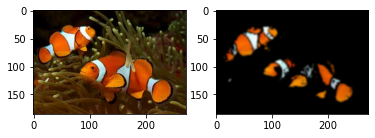

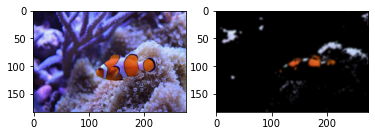

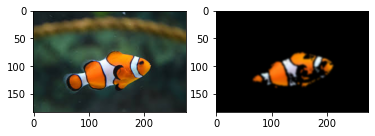

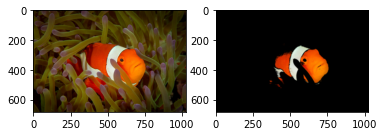

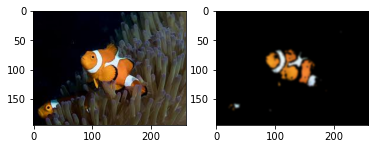

In [52]:
for i in range(1, 6):
    plt.subplot(1, 2, 1)
    plt.imshow(nemos_friends[i])
    plt.subplot(1, 2, 2)
    plt.imshow(results[i])
    plt.show()